In [29]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.mask import mask

<Axes: >

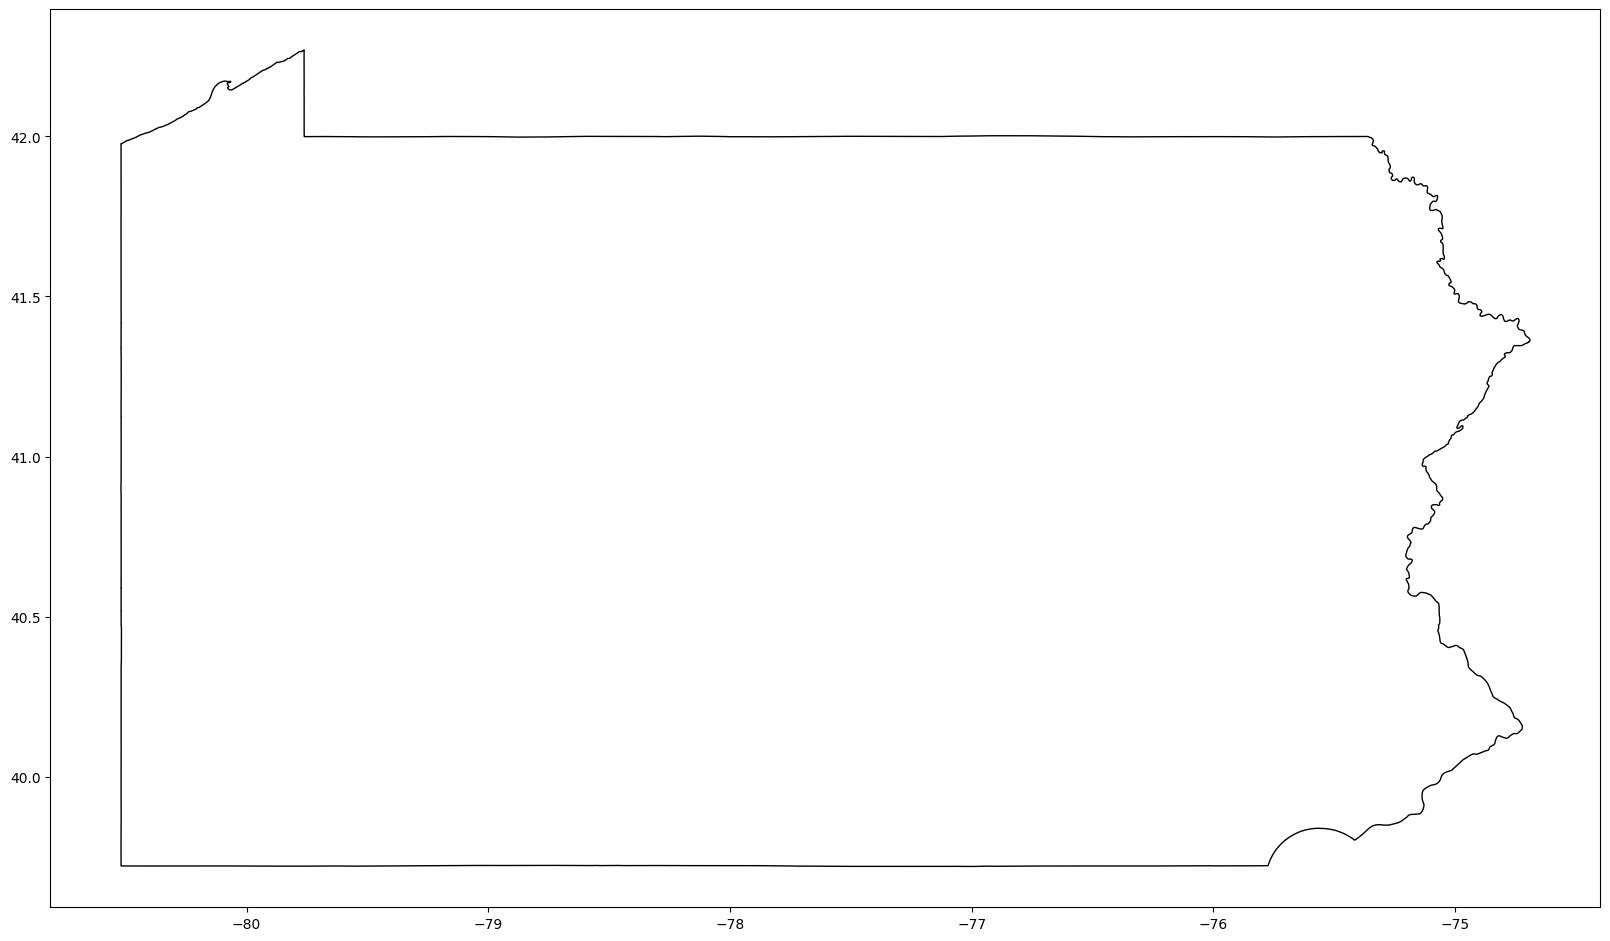

In [38]:
# Download New York state boundary from TIGER/Line
url = "https://www2.census.gov/geo/tiger/GENZ2022/shp/cb_2022_us_state_500k.zip"

# Read directly from the ZIP file
us_states = gpd.read_file(url)

# Filter for New York (NY FIPS code = 36)
new_york = us_states[us_states["STATEFP"] == "42"]

# Plot the New York state boundary
new_york.plot(figsize=(20, 30), edgecolor="black", facecolor="none")

In [39]:

# Load the main shapefile (e.g., a layer with many features)
main_shapefile = gpd.read_file("/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/data/prism_4km_mesh/prism_4km_mesh.shp")

# Load the subset shapefile (e.g., a region you want to extract)
subset_shapefile = new_york #gpd.read_file("subset_layer.shp")

# Ensure both shapefiles use the same coordinate reference system (CRS)
main_shapefile = main_shapefile.to_crs(subset_shapefile.crs)


In [40]:
# Perform spatial intersection (extract only the parts that overlap)
extracted_subset = gpd.overlay(main_shapefile, subset_shapefile, how='intersection')


<Axes: >

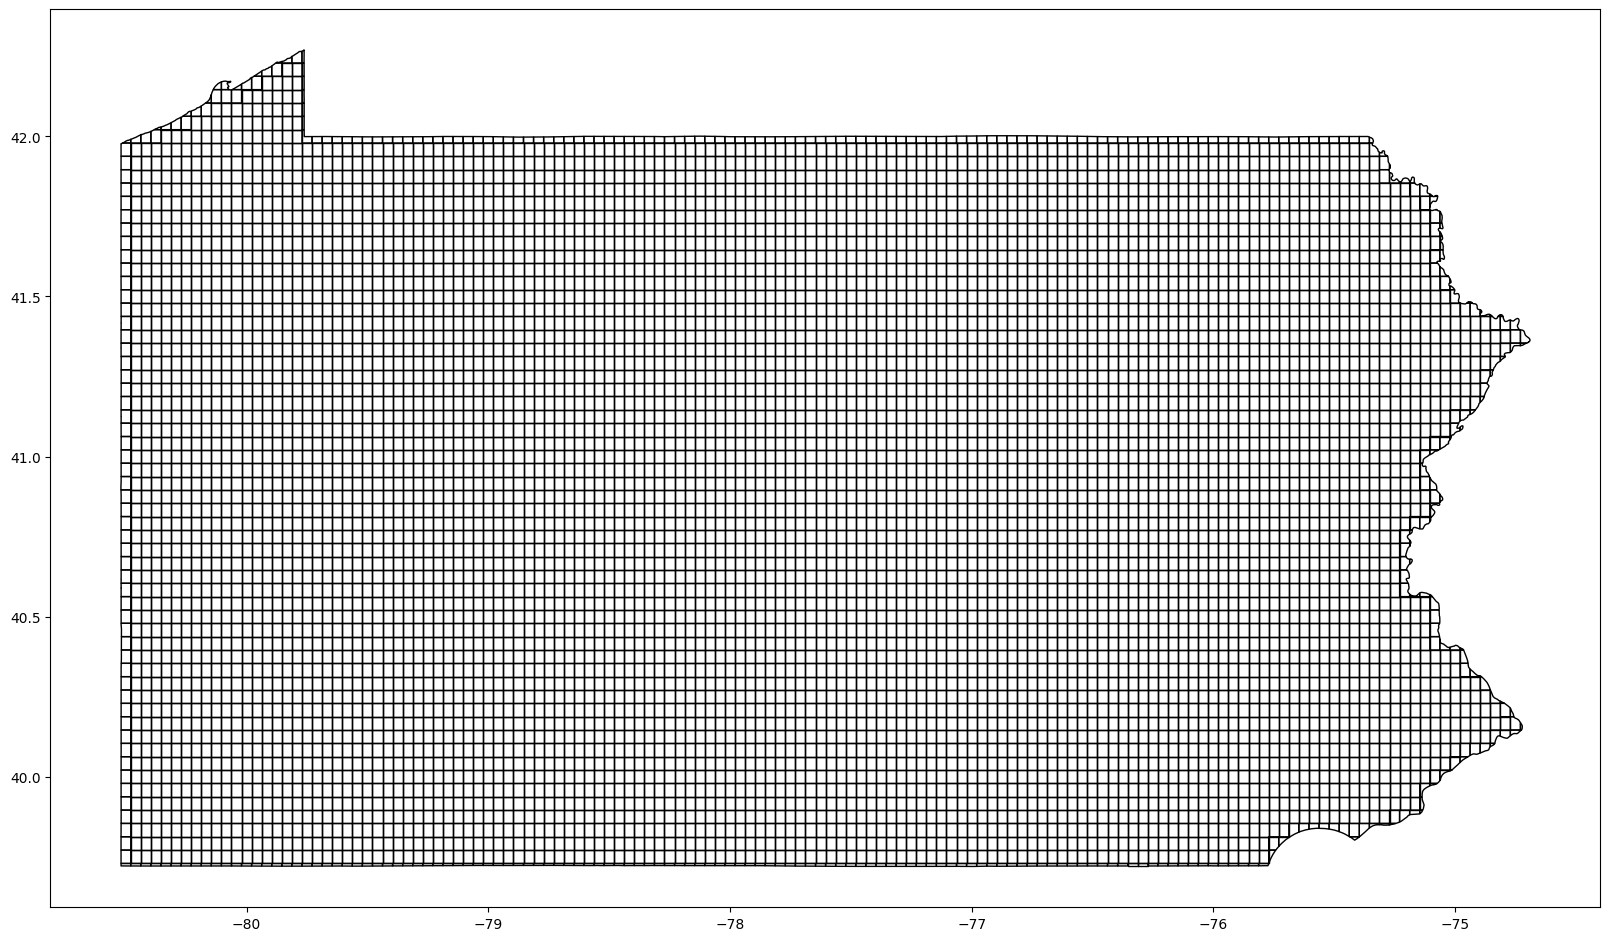

In [41]:
# Plot extracted subset
extracted_subset.plot(figsize=(20, 30), edgecolor="black", facecolor="none")

In [42]:
extracted_subset.to_file("/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/data/pennsylvania/pa_prism_4km_mesh_ny.shp")

In [43]:
# load raster CDL data
ny_cdl_path = '/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/data/CDL/new_york/CDL_2015_STATE_FIPS_36.tif'

In [44]:
import rasterio

ny_cdl_path = '/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/data/CDL/new_york/CDL_2015_STATE_FIPS_36.tif'

scr = rasterio.open(ny_cdl_path)



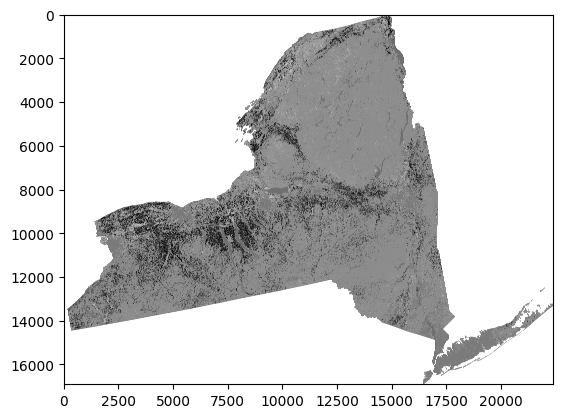

In [46]:
import matplotlib.pyplot as plt

plt.imshow(scr.read(1), cmap='gray')
plt.show()
